In [ ]:
# Analyse Exploratoire de Données - Netflix Movies and TV Shows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
%matplotlib inline

In [3]:
netflix = pd.read_csv('./netflix_titles.csv')

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.info()

(netflix.isnull().mean() * 100).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

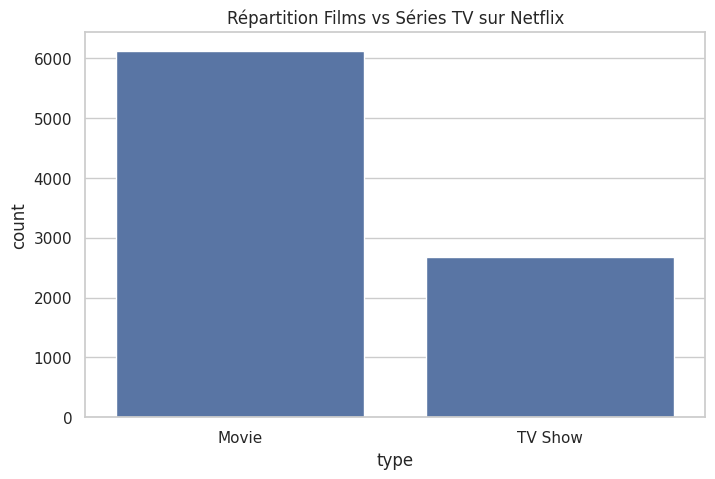

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=netflix)
plt.title('Répartition Films vs Séries TV sur Netflix')
plt.show()

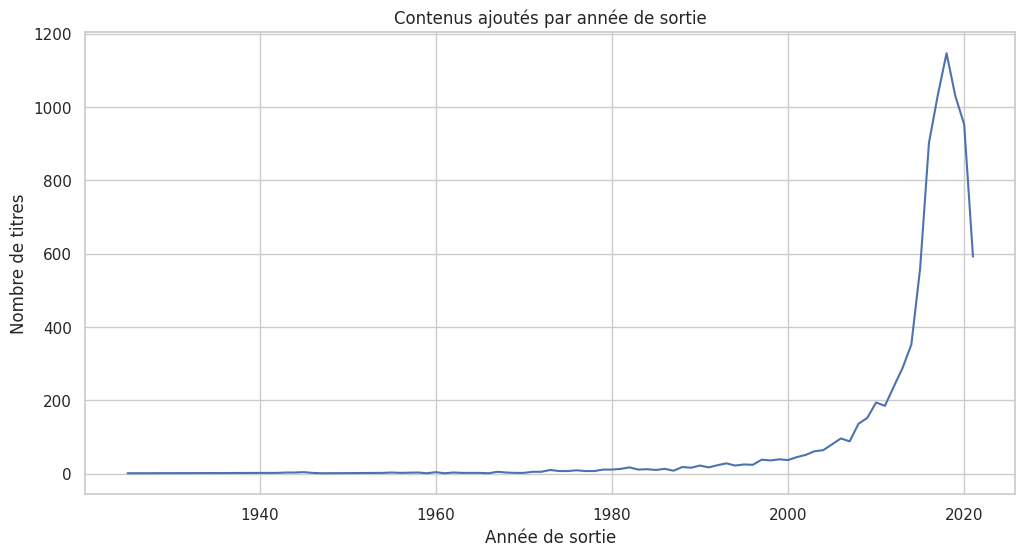

In [6]:
plt.figure(figsize=(12,6))
netflix.groupby('release_year')['show_id'].count().plot()
plt.title('Contenus ajoutés par année de sortie')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de titres')
plt.show()

In [8]:
movies = netflix[netflix['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

movies['duration_min'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

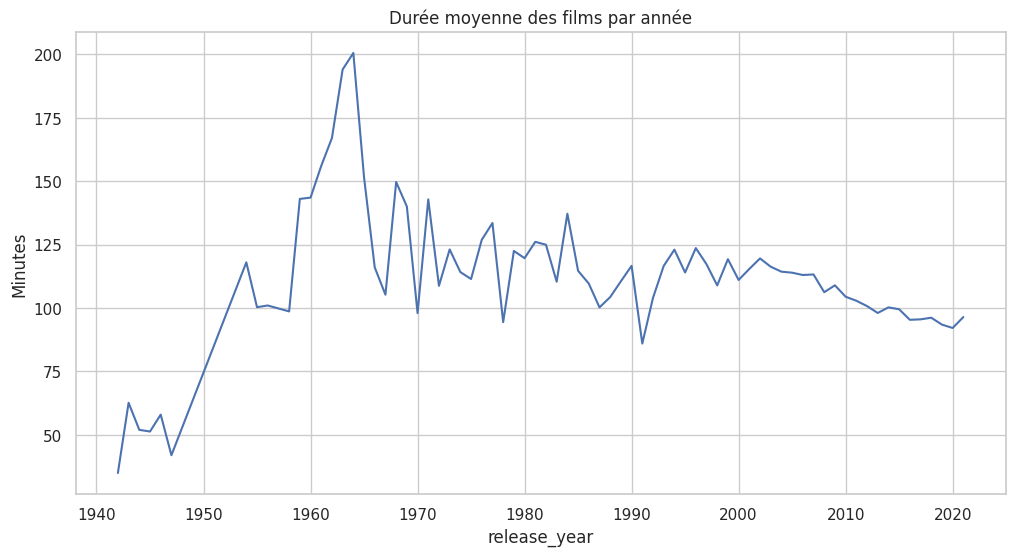

In [9]:
plt.figure(figsize=(12,6))
movies.groupby('release_year')['duration_min'].mean().plot()
plt.title('Durée moyenne des films par année')
plt.ylabel('Minutes')
plt.show()

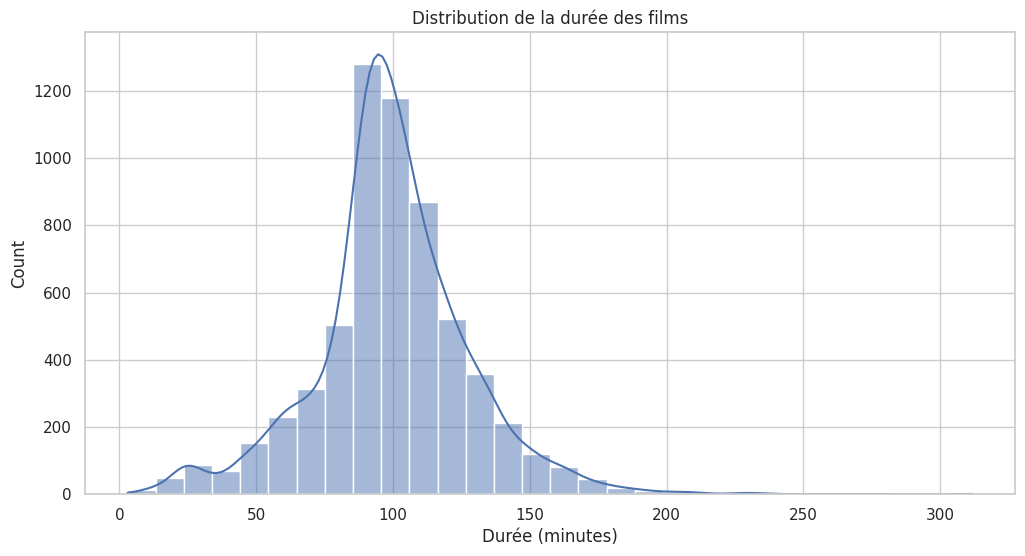

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(movies['duration_min'], bins=30, kde=True)
plt.title('Distribution de la durée des films')
plt.xlabel('Durée (minutes)')
plt.show()

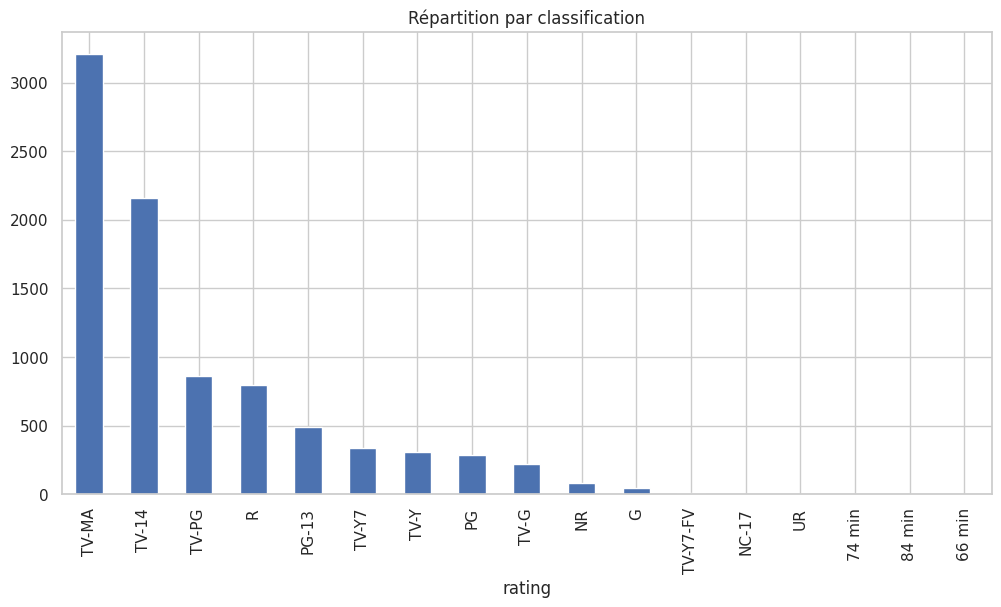

In [11]:
plt.figure(figsize=(12,6))
netflix['rating'].value_counts().plot(kind='bar')
plt.title('Répartition par classification')
plt.show()

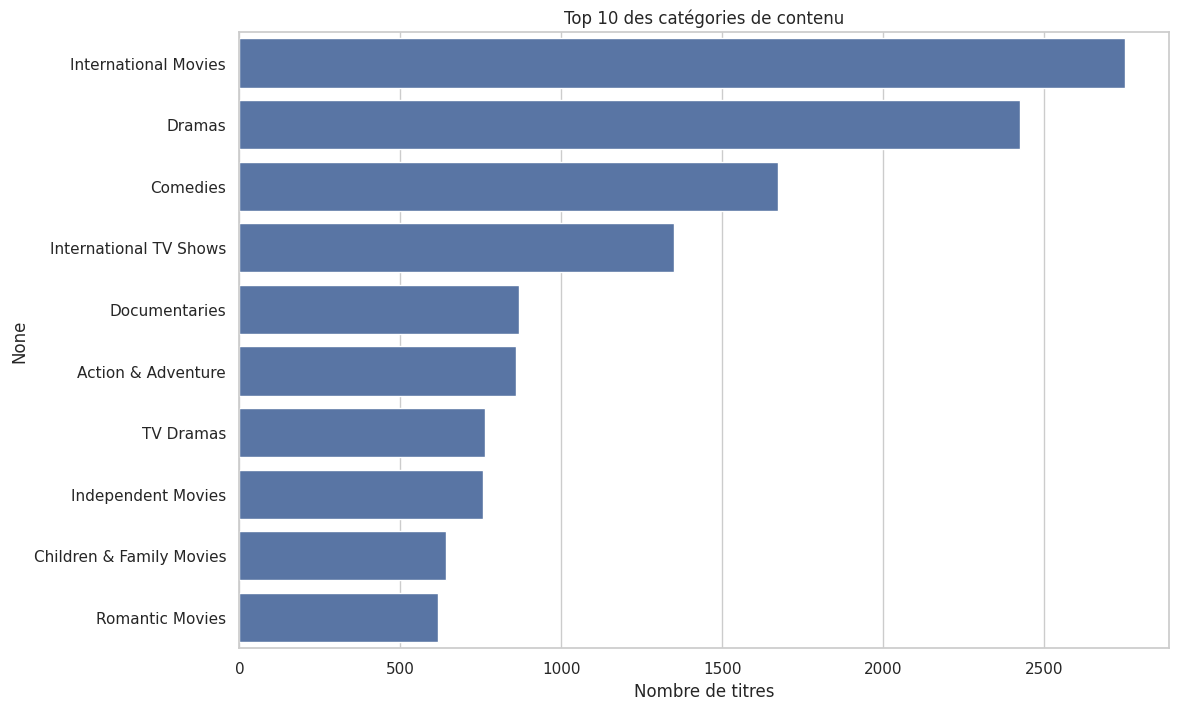

In [12]:
categories = netflix['listed_in'].str.split(', ').explode()
top_categories = pd.Series(Counter(categories)).sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 des catégories de contenu')
plt.xlabel('Nombre de titres')
plt.show()